In [26]:
# Step 1: Import necessary libraries (uncomment for removing warnings)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Suppress oneDNN warning
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # Suppress TF info/warnings (0=all, 1=info off, 2=info/warn off, 3=all
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # Further reduce TF logging
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [6]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

I0000 00:00:1764910490.867325   26444 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5672 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


In [22]:
model = models.Sequential()
model.add(layers.Input(x_train.shape[1:]))
model.add(layers.Resizing(224, 224, interpolation="bilinear"))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 56, 56, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 1, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1, 1, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 1, 1, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 1, 1, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 1, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,622,154 (82.48 MB)

 Trainable params: 21,622,154 (82.48 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss=losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
    )

history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=40,
    validation_data=(x_val, y_val)
    )

Epoch 1/40
  7/907 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0924 - loss: 2.3066

I0000 00:00:1764911135.012636   26633 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


907/907 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.8004 - loss: 0.5406 - val_accuracy: 0.9830 - val_loss: 0.0701
Epoch 2/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9744 - loss: 0.0968 - val_accuracy: 0.9850 - val_loss: 0.0589
Epoch 3/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9811 - loss: 0.0734 - val_accuracy: 0.9865 - val_loss: 0.0573
Epoch 4/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9846 - loss: 0.0607 - val_accuracy: 0.9905 - val_loss: 0.0400
Epoch 5/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9870 - loss: 0.0510 - val_accuracy: 0.9905 - val_loss: 0.0479
Epoch 6/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9894 - loss: 0.0430 - val_accuracy: 0.9910 - val_loss: 0.0332
Epoch 7/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9894 - loss: 0.0423 - val_accuracy: 0.9895 - val_loss: 0.0462
Epoch 8/40
907/907 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9921 - loss: 0.0319 - val_accurac

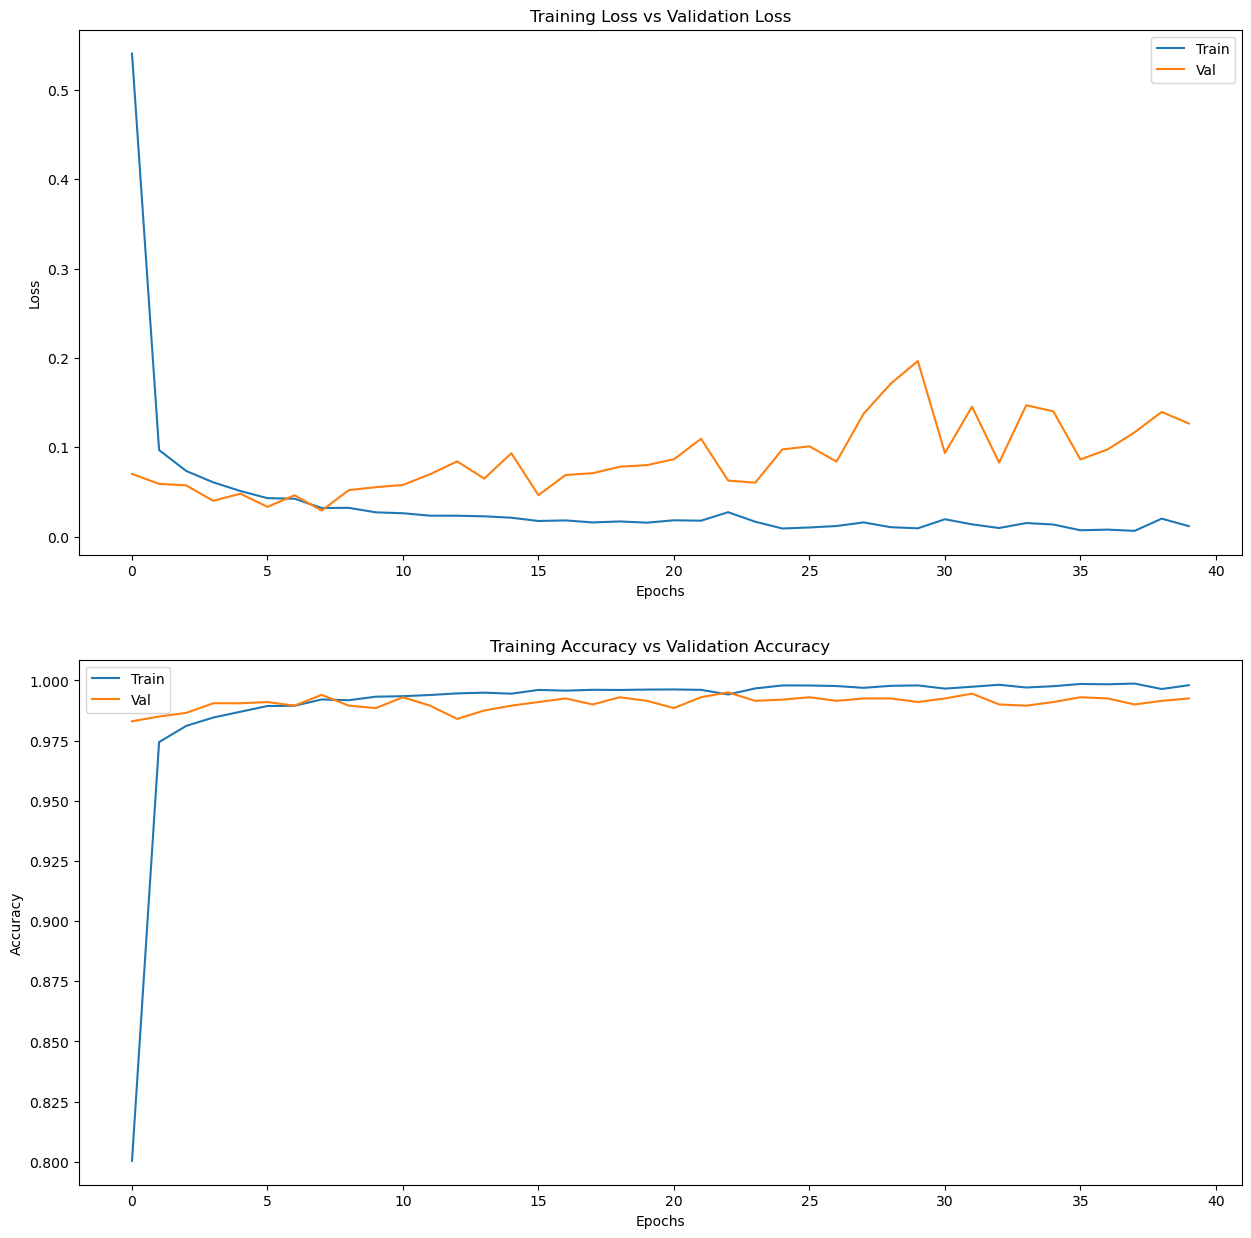

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9888 - loss: 0.0983


[0.09827180951833725, 0.9887999892234802]